In [650]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import datasets

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [651]:
df = pd.read_csv('final_baseball.csv')

In [652]:
df.head()

,Rk,Name,Age,Tm,BA,OBP,SLG,OPS,BAbip,HR%,...,Games,IP,Hits,HRs,Walks,Ks,Earned Runs,Runs,ERA,ERA+
0,1,Fernando Abad*,35,BAL,0.292,0.354,0.444,0.799,0.328,1.3%,...,15,17.1,21,1,7,10,11,12,5.71,82.0
1,2,Cory Abbott,25,CHC,0.308,0.410,0.673,1.083,0.282,8.1%,...,6,12.1,16,5,9,8,11,13,8.03,54.0
2,3,Albert Abreu,25,NYY,0.203,0.314,0.438,0.751,0.205,5.2%,...,27,36.0,26,8,19,35,21,21,5.25,82.0
3,4,Bryan Abreu,24,HOU,0.254,0.348,0.406,0.754,0.310,2.5%,...,31,36.0,35,4,18,36,23,26,5.75,75.0
4,5,Domingo Acevedo,27,OAK,0.188,0.257,0.406,0.663,0.190,5.7%,...,8,9.0,6,2,3,9,3,3,3.00,142.0


In [653]:
df.drop_duplicates(subset = 'Name', keep='first', inplace = True)

In [654]:
df.drop(columns=['Rk'], inplace = True)

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 1140
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         895 non-null    object 
 1   Age          895 non-null    int64  
 2   Tm           895 non-null    object 
 3   BA           895 non-null    float64
 4   OBP          895 non-null    float64
 5   SLG          895 non-null    float64
 6   OPS          895 non-null    float64
 7   BAbip        892 non-null    float64
 8   HR%          895 non-null    object 
 9   SO%          895 non-null    object 
 10  BB%          895 non-null    object 
 11  EV           892 non-null    float64
 12  HardH%       892 non-null    object 
 13  LD%          892 non-null    object 
 14  GB%          892 non-null    object 
 15  FB%          892 non-null    object 
 16  GB/FB        865 non-null    float64
 17  WPA          895 non-null    float64
 18  cWPA         895 non-null    object 
 19  RE24   

In [807]:
df = df[df['ERA+'] < 300]

In [808]:
reg_df= df.drop(columns=['EV','OBP', 'SLG','Name', 'Tm', 'GB/FB', 'WPA', 'cWPA', 'RE24', 'Games', 
                         'IP', 'Hits', 'HRs','Walks', 'Ks', 'Earned Runs', 'Runs', 'ERA'])

#after running heatmap and finding vif multiple times, excluded EV, OBP, SLG

In [809]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1140
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     825 non-null    int64  
 1   BA      825 non-null    float64
 2   OPS     825 non-null    float64
 3   BAbip   825 non-null    float64
 4   HR%     825 non-null    object 
 5   SO%     825 non-null    object 
 6   BB%     825 non-null    object 
 7   HardH%  825 non-null    object 
 8   LD%     825 non-null    object 
 9   GB%     825 non-null    object 
 10  FB%     825 non-null    object 
 11  ERA+    825 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 83.8+ KB


In [810]:
reg_df.head()

,Age,BA,OPS,BAbip,HR%,SO%,BB%,HardH%,LD%,GB%,FB%,ERA+
0,35,0.292,0.799,0.328,1.3%,12.7%,8.9%,35.5%,24.2%,50.0%,17.7%,82.0
1,25,0.308,1.083,0.282,8.1%,12.9%,14.5%,48.9%,17.8%,40.0%,31.1%,54.0
2,25,0.203,0.751,0.205,5.2%,22.9%,12.4%,28.4%,22.9%,44.8%,27.1%,82.0
3,24,0.254,0.754,0.310,2.5%,22.4%,11.2%,40.4%,19.2%,48.1%,25.0%,75.0
4,27,0.188,0.663,0.190,5.7%,25.7%,8.6%,34.8%,13.0%,52.2%,30.4%,142.0


In [811]:
reg_df['HR%'] = reg_df['HR%'].str.rstrip('%').astype('float') / 100.0
reg_df['SO%'] = reg_df['SO%'].str.rstrip('%').astype('float') / 100.0
reg_df['BB%'] = reg_df['BB%'].str.rstrip('%').astype('float') / 100.0
reg_df['HardH%'] = reg_df['HardH%'].str.rstrip('%').astype('float') / 100.0
reg_df['LD%'] = reg_df['LD%'].str.rstrip('%').astype('float') / 100.0
reg_df['GB%'] = reg_df['GB%'].str.rstrip('%').astype('float') / 100.0
reg_df['FB%'] = reg_df['FB%'].str.rstrip('%').astype('float') / 100.0

In [812]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1140
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     825 non-null    int64  
 1   BA      825 non-null    float64
 2   OPS     825 non-null    float64
 3   BAbip   825 non-null    float64
 4   HR%     825 non-null    float64
 5   SO%     825 non-null    float64
 6   BB%     825 non-null    float64
 7   HardH%  825 non-null    float64
 8   LD%     825 non-null    float64
 9   GB%     825 non-null    float64
 10  FB%     825 non-null    float64
 11  ERA+    825 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 83.8 KB


In [813]:
reg_df.describe()

,Age,BA,OPS,BAbip,HR%,SO%,BB%,HardH%,LD%,GB%,FB%,ERA+
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,28.329697,0.267635,0.816428,0.304122,0.039783,0.210378,0.100937,0.399692,0.239233,0.410732,0.268015,100.426667
std,3.575863,0.092025,0.252756,0.100659,0.035248,0.079027,0.057422,0.102448,0.084621,0.110878,0.100955,47.220175
min,21.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,26.000000,0.219000,0.667000,0.261000,0.022000,0.167000,0.071000,0.348000,0.205000,0.350000,0.213000,68.000000
50%,28.000000,0.250000,0.756000,0.294000,0.033000,0.214000,0.094000,0.391000,0.236000,0.415000,0.262000,95.000000
75%,31.000000,0.290000,0.878000,0.333000,0.048000,0.259000,0.121000,0.437000,0.267000,0.480000,0.308000,125.000000
max,41.000000,1.000000,2.450000,1.000000,0.300000,0.500000,0.667000,1.000000,1.000000,1.000000,1.000000,288.000000


In [814]:
#replaced 0 values with arbitrarily small numbers to aid feature engineering later on
reg_df[reg_df==0] = 0.0001

In [815]:
reg_df.describe()

,Age,BA,OPS,BAbip,HR%,SO%,BB%,HardH%,LD%,GB%,FB%,ERA+
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,28.329697,0.267635,0.816428,0.304124,0.039791,0.210382,0.100941,0.399693,0.239235,0.410733,0.268016,100.426667
std,3.575863,0.092025,0.252756,0.100654,0.035239,0.079016,0.057415,0.102445,0.084615,0.110875,0.100951,47.220175
min,21.000000,0.000100,0.200000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,6.000000
25%,26.000000,0.219000,0.667000,0.261000,0.022000,0.167000,0.071000,0.348000,0.205000,0.350000,0.213000,68.000000
50%,28.000000,0.250000,0.756000,0.294000,0.033000,0.214000,0.094000,0.391000,0.236000,0.415000,0.262000,95.000000
75%,31.000000,0.290000,0.878000,0.333000,0.048000,0.259000,0.121000,0.437000,0.267000,0.480000,0.308000,125.000000
max,41.000000,1.000000,2.450000,1.000000,0.300000,0.500000,0.667000,1.000000,1.000000,1.000000,1.000000,288.000000


In [816]:
reg_df.corr()

,Age,BA,OPS,BAbip,HR%,SO%,BB%,HardH%,LD%,GB%,FB%,ERA+
Age,1.000000,0.001177,-0.005890,0.008914,0.034501,0.036327,-0.146639,-0.005875,-0.013957,0.013208,0.000495,0.036612
BA,0.001177,1.000000,0.863946,0.823558,0.235733,-0.568731,0.182152,0.252266,0.441362,-0.234378,0.003534,-0.607641
OPS,-0.005890,0.863946,1.000000,0.557655,0.611259,-0.550142,0.242832,0.397672,0.272490,-0.323326,0.234421,-0.671473
BAbip,0.008914,0.823558,0.557655,1.000000,-0.181730,-0.175478,0.185995,0.155432,0.470133,-0.122403,-0.145204,-0.456550
HR%,0.034501,0.235733,0.611259,-0.181730,1.000000,-0.234721,-0.101474,0.308815,-0.130434,-0.290324,0.437524,-0.334016
SO%,0.036327,-0.568731,-0.550142,-0.175478,-0.234721,1.000000,-0.092222,-0.152713,-0.133638,0.038828,0.016430,0.390644
BB%,-0.146639,0.182152,0.242832,0.185995,-0.101474,-0.092222,1.000000,0.166766,0.086901,-0.087027,0.056927,-0.204428
HardH%,-0.005875,0.252266,0.397672,0.155432,0.308815,-0.152713,0.166766,1.000000,0.171319,-0.113238,0.116333,-0.219868
LD%,-0.013957,0.441362,0.272490,0.470133,-0.130434,-0.133638,0.086901,0.171319,1.000000,-0.361537,-0.348019,-0.187802
GB%,0.013208,-0.234378,-0.323326,-0.122403,-0.290324,0.038828,-0.087027,-0.113238,-0.361537,1.000000,-0.645445,0.210538


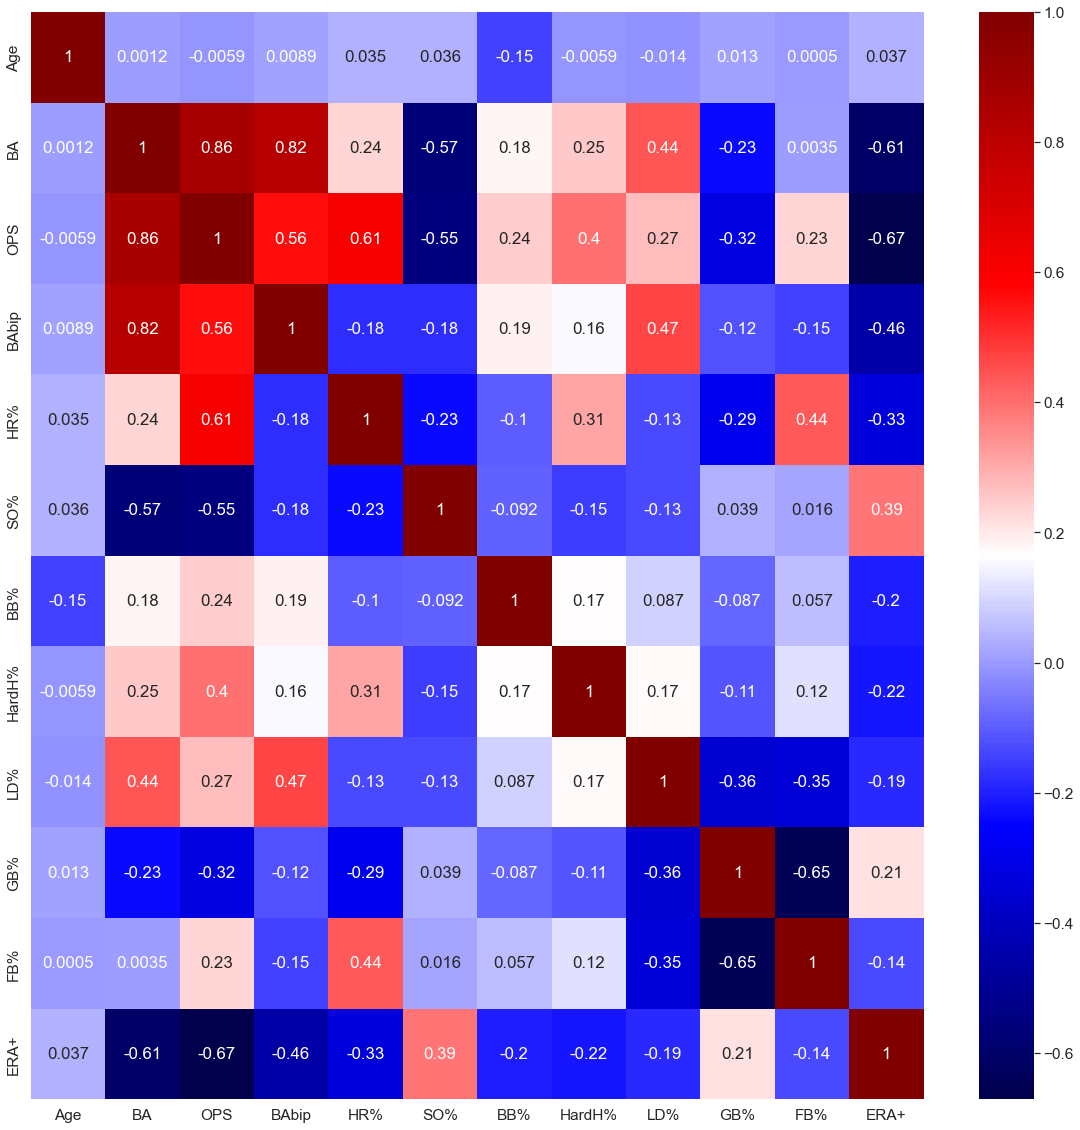

In [817]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(reg_df.corr(), cmap="seismic", annot = True);

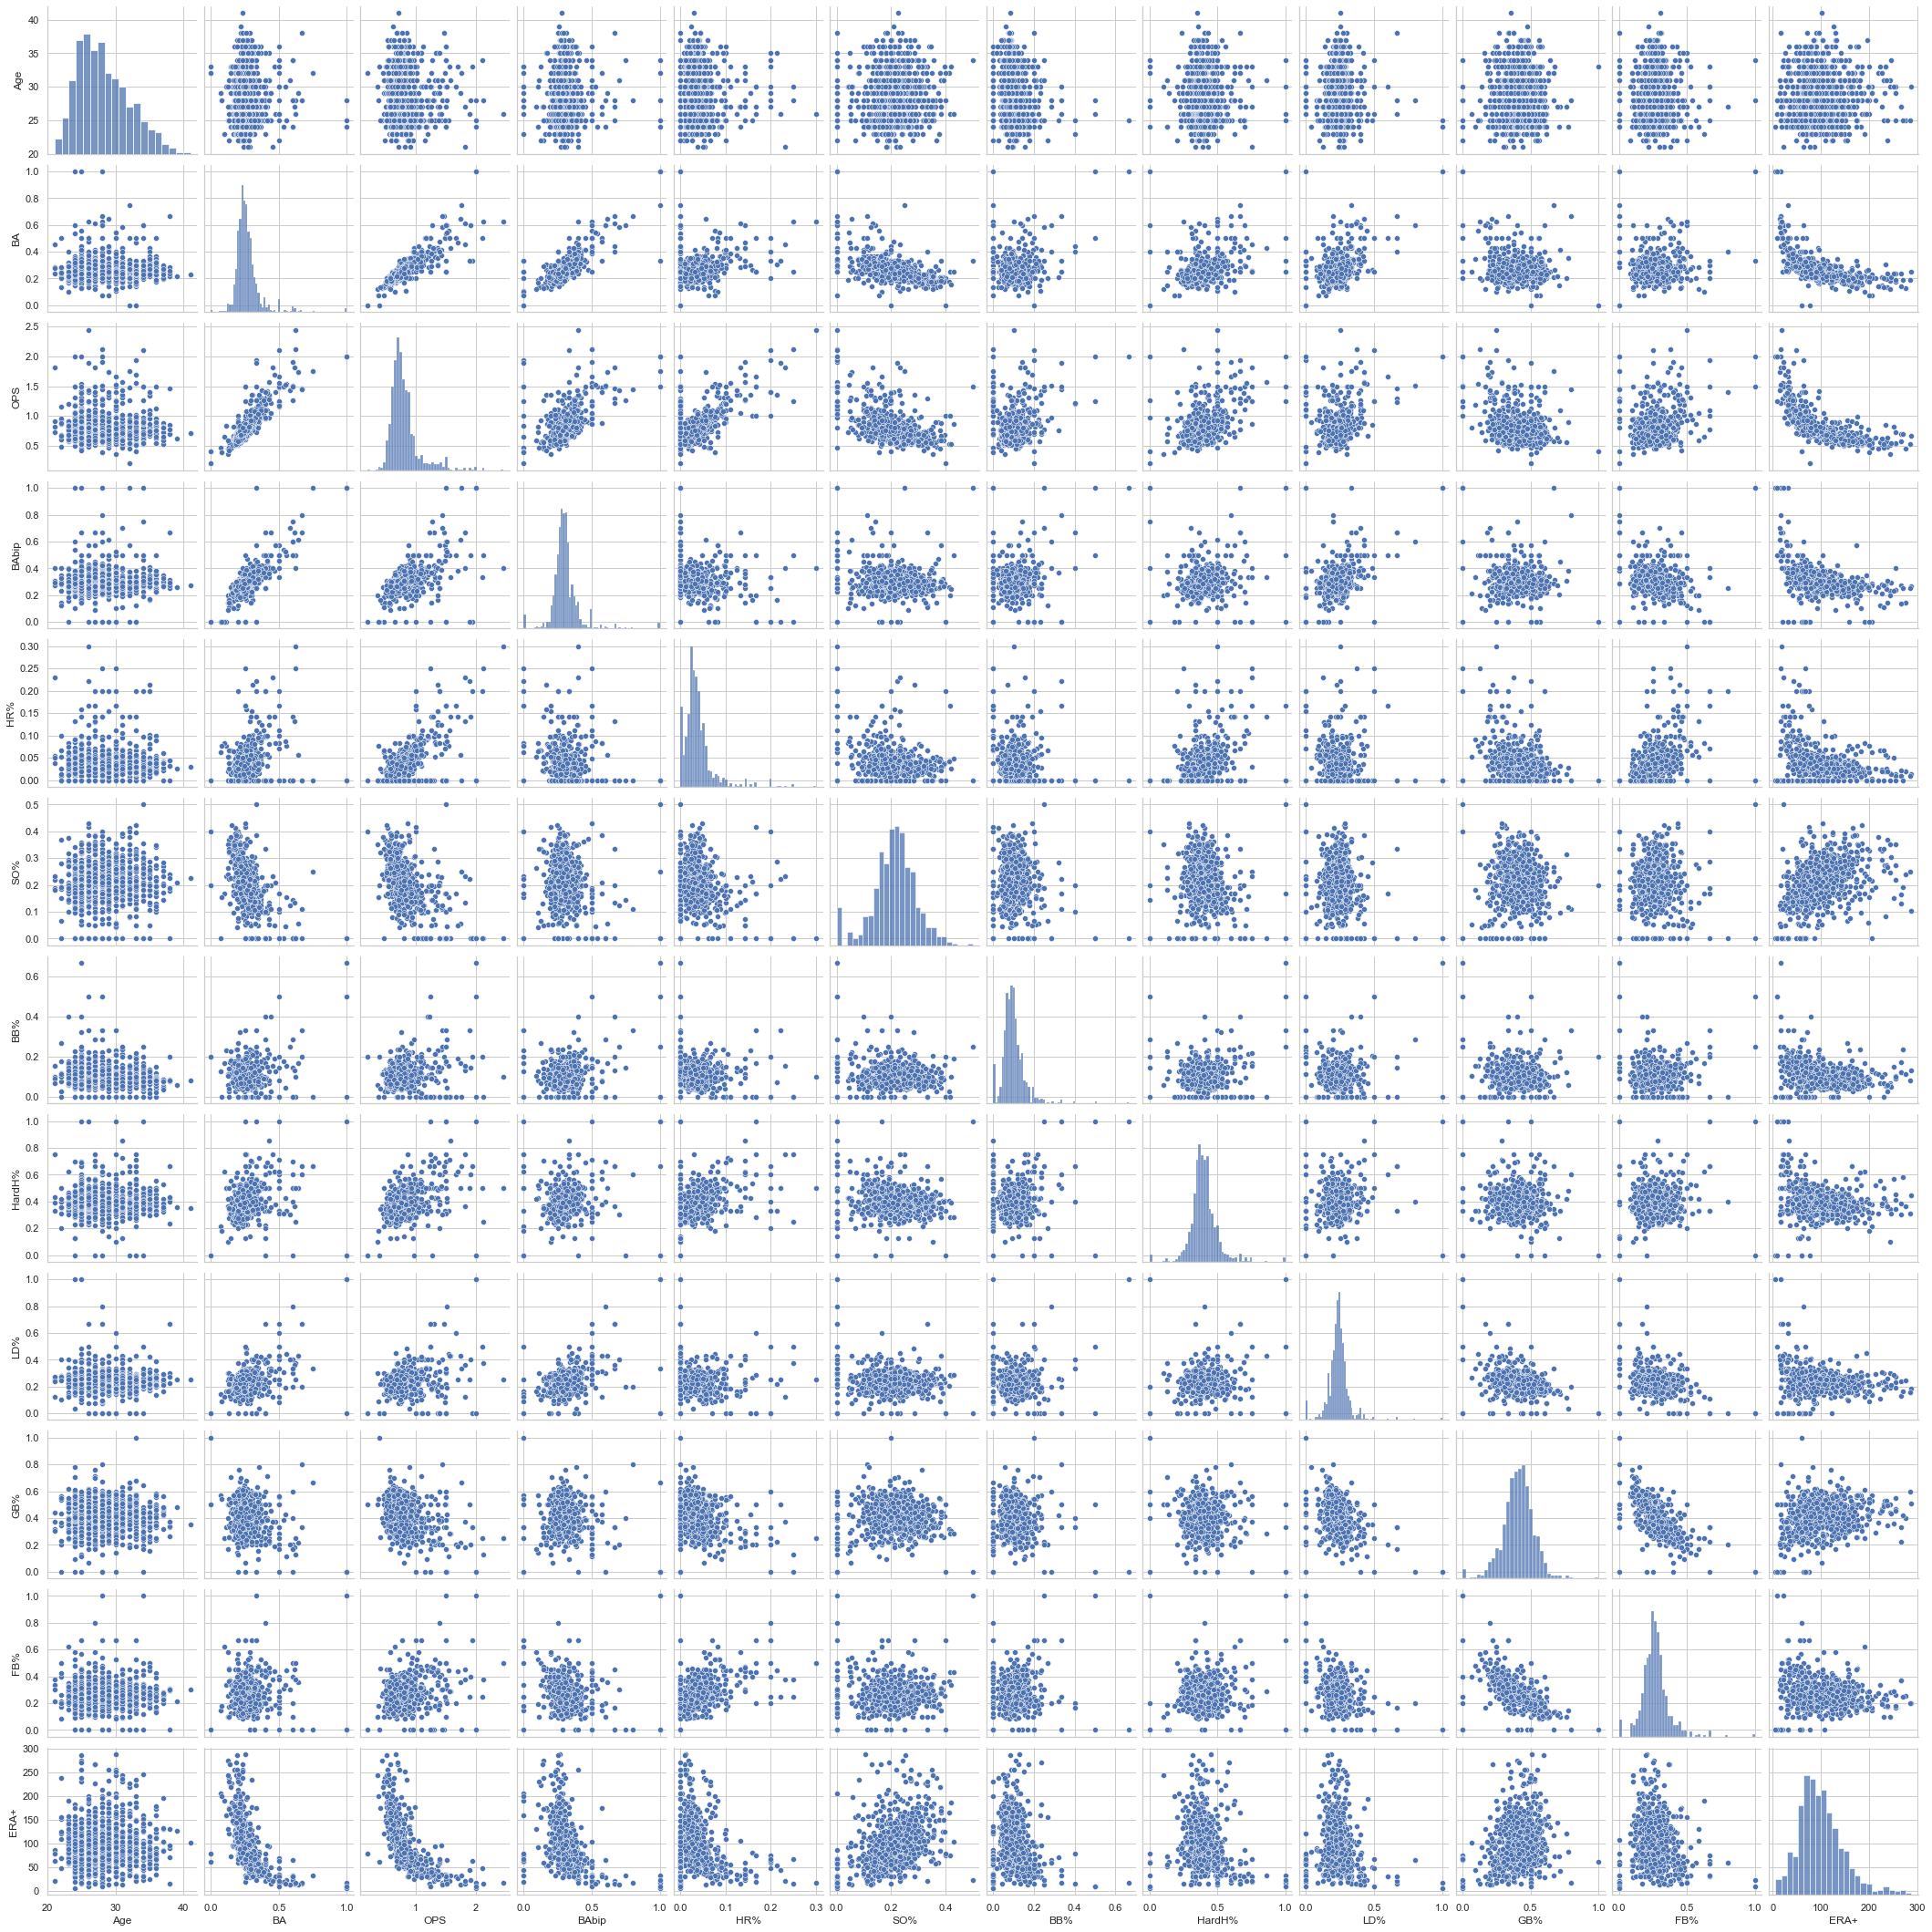

In [818]:
sns.set(context='notebook', style='whitegrid', font_scale=1) 
sns.pairplot(
    reg_df.astype(float)
);

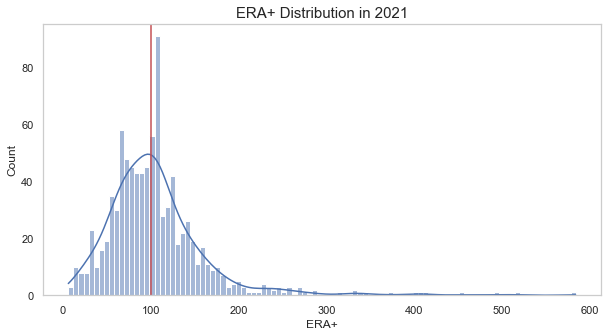

In [738]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.histplot(reg_df['ERA+'], kde=True, bins=100);
plt.axvline(x = 100, color = 'r')
plt.title("ERA+ Distribution in 2021", fontsize = 15)
plt.gcf().set_size_inches(10,5)
ax.text(0,80,'R^2: 0.364', size = 20)
ax.text(200,350,'MAE: 28.57', size = 20)
ax.text(200,400,'R^2: 0.364', size = 20)

In [819]:
reg_df[reg_df['ERA+'] > 100].count()

Age       366
BA        366
OPS       366
BAbip     366
HR%       366
SO%       366
BB%       366
HardH%    366
LD%       366
GB%       366
FB%       366
ERA+      366
dtype: int64

In [820]:
reg_df[reg_df['ERA+'] == 100].count()

Age       7
BA        7
OPS       7
BAbip     7
HR%       7
SO%       7
BB%       7
HardH%    7
LD%       7
GB%       7
FB%       7
ERA+      7
dtype: int64

In [821]:
reg_df[reg_df['ERA+'] < 100].count()

Age       452
BA        452
OPS       452
BAbip     452
HR%       452
SO%       452
BB%       452
HardH%    452
LD%       452
GB%       452
FB%       452
ERA+      452
dtype: int64

### Setting a Baseline

In [822]:
#Baseline Linear Regression
lr_full = LinearRegression()

#Features (did this multiple times after rerunning pair plots and vif below) - This is final list
X_full = reg_df.loc[:, 'Age':'FB%']
#mask = ['Age', 'BA', 'OPS', 'BAbip', 'HR%', 'SO%', 'BB%', 'HardH%', 'LD%', 'GB%', 'FB%']

# Target - 100 = average pitcher, any higher = good pitcher, any lower = below average pitcher
y = reg_df['ERA+']

#Initial training  
lr_full.fit(X_full, y)

#Initial R^2 scoring
print(lr_full.score(X_full, y))

y_simple = lr_full.predict(X_full)
print(mean_absolute_error(y, y_simple))

0.4790833346759704
24.29058669707774


In [823]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(df_X):
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    return pd.Series(vif_data, index=df_X.columns)

In [824]:
vif(reg_df.iloc[:, :-1]).round(2)
#some values still high but feel they require inclusion for now

Age        56.70
BA        230.18
OPS       241.10
BAbip     144.05
HR%        20.00
SO%        28.95
BB%         6.62
HardH%     22.20
LD%        20.45
GB%        24.97
FB%        18.88
dtype: float64

### Simple Linear Regression

In [825]:
#K-fold Cross Validation

X, y = reg_df.drop('ERA+',axis=1), reg_df['ERA+']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

In [826]:
#cross-validation on original features
lm = LinearRegression()

scores = cross_val_score(lm, X, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric

print(scores)
print('')
print(scores.mean())

[0.41830135 0.44313153 0.40663481 0.53635069 0.58990818 0.45289152
 0.45108585 0.3906836  0.50605142 0.49374417]

0.4688783113150704


In [827]:
#training model on original features
lm.fit(X, y)

LinearRegression()

In [828]:
#score training data on original features
print(lm.score(X, y))

#score test data on original features
print(lm.score(X_test, y_test))

0.49576271593118015
0.32036685455619407


In [829]:
#cross-validation on new features after feature engineering
lm2 = LinearRegression()
X['1/BA'] = 1/(X['BA'])
X['1/OPS'] = 1/(X['OPS'])
X['1/BABIP'] = 1/(X['BAbip'])
X['1/HR'] = 1/(X['HR%'])
#X['SO2'] = 1/(X['SO%'])
#X['BB2'] = 1/(X['BB%'])
#X['GB2'] = X['GB%']**2

scores2 = cross_val_score(lm2, X, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric
print(scores2)
print('')
print(scores2.mean())

[-0.2012721   0.65594417 -0.06833503  0.70023768  0.7141694   0.61388867
  0.58466259  0.42906604  0.68906593  0.62830856]

0.4745735911474009


In [830]:
#training model on updated features
lm2.fit(X, y)

#score training data on updated features
lm2.score(X, y)

0.6261549602050676

In [831]:
#same transformations to test data
X_test['1/BA'] = 1/(X_test['BA'])
X_test['1/OPS'] = 1/(X_test['OPS'])
X_test['1/BABIP'] = 1/(X_test['BAbip'])
X_test['1/HR'] = 1/(X_test['HR%'])
#X_test['SO2'] = 1/(X_test['SO%'])
#X_test['BB2'] = 1/(X_test['BB%'])
#X_test['GB2'] = X_test['GB%']**2

#score test data on updated features
lm2.score(X_test, y_test)

0.5464681335563728

In [832]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [833]:
#cross-validation on more features after interaction feature engineering
simple_reg = LinearRegression()
X['SO/BB'] = X['SO%']/X['BB%']
X['GB/FB'] = X['GB%']/X['FB%']
X['LD*HardH'] = X['LD%']*X['HardH%']

r2_lr_scores = cross_val_score(simple_reg, X, y,
                cv=kfold , 
                scoring='r2') 
neg_mae_lr_scores = cross_val_score(simple_reg, X, y, 
                cv=kfold ,
                scoring='neg_mean_absolute_error') 

print('Simple Linear Regression R^2 Scores:', r2_lr_scores)
print('')
print('Average Linear Regression R^2 Scores:', r2_lr_scores.mean())
print('')
print('Simple Linear Regression negative MAE Scores:', neg_mae_lr_scores)
print('')
print('Average Linear Regression negative MAE Scores:', neg_mae_lr_scores.mean())

Simple Linear Regression R^2 Scores: [0.21294052 0.64934672 0.0976115  0.60501999 0.53098809]

Average Linear Regression R^2 Scores: 0.41918136522379534

Simple Linear Regression negative MAE Scores: [-23.46132754 -20.32945408 -20.41528129 -19.63259767 -22.72723353]

Average Linear Regression negative MAE Scores: -21.313178822670743


In [834]:
#training model on updated features
#score training data on updated features
simple_reg.fit(X, y)
print('R^2 of train data:', simple_reg.score(X, y))

R^2 of train data: 0.6271893107673807


In [835]:
#same transformations to test data
X_test['SO/BB'] = X_test['SO%']/X_test['BB%']
X_test['GB/FB'] = X_test['GB%']/X_test['FB%']
X_test['LD*HardH'] = X_test['LD%']*X_test['HardH%']

#score test data on updated features
print('R^2 of test data:', simple_reg.score(X_test, y_test))

R^2 of test data: 0.5443644201777438


In [836]:
for feature, coef in zip(X.columns, simple_reg.coef_):
    print(feature, ':', coef)
#list(zip(X_test.columns, simple_reg.coef_))
print('Coefficient: ' + str(simple_reg.intercept_))

Age : 0.2570332777749595
BA : 129.9805815842432
OPS : 7.628220357665715
BAbip : -155.74135088277464
HR% : -25.746208881187798
SO% : 58.770822262449144
BB% : -44.548481314913225
HardH% : 23.79005953530189
LD% : 29.33550697126385
GB% : 54.69719157473043
FB% : 27.012136427447242
1/BA : -0.033901296140301004
1/OPS : 119.24511523217234
1/BABIP : -0.001553951540424343
1/HR : 0.0006518968894234086
SO/BB : -0.0009592608902368831
GB/FB : 0.0029055361863063642
LD*HardH : 16.689855550152014
Coefficient: -111.76597915144252


### LassoCV

In [837]:
#standard scale data for regularized regression
std = StandardScaler()
X_scaled = std.fit_transform(X)

# Apply the same scaler to test set
X_test_scaled = std.transform(X_test)

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=kfold)
lasso_model.fit(X_scaled, y)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

In [838]:
lasso_model.alpha_
#optimal alpha based on lasso

1.7027691722258995

In [839]:
r2_lasso_scores = cross_val_score(lasso_model, X, y, # estimator, features, target
                cv=kfold , # number of folds 
                scoring='r2') # scoring metric
neg_mae_lasso_scores = cross_val_score(lasso_model, X, y, # estimator, features, target
                cv=kfold , # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

print('Lasso Regression R^2 Scores:', r2_lasso_scores)
print('')
print('Average Lasso Regression R^2 Scores:', r2_lasso_scores.mean())
print('')
print('Lasso Regression negative MAE Scores:', neg_mae_lasso_scores)
print('')
print('Average Lasso Regression negative MAE Scores:', neg_mae_lasso_scores.mean())

Lasso Regression R^2 Scores: [ 0.02642198  0.609596    0.01610279 -0.03979843  0.65026771]

Average Lasso Regression R^2 Scores: 0.25251800930167495

Lasso Regression negative MAE Scores: [-35.11940747 -21.87112389 -31.66788734 -39.48196144 -21.81158341]

Average Lasso Regression negative MAE Scores: -29.990392706270352


In [840]:
lasso_model.score(X_scaled, y)
#score based on optimal alpha model and training data

0.6110679329658585

In [841]:
lasso_model.score(X_test_scaled, y_test)
#score based on optimal alpha model and test data


0.5703002423914983

In [842]:
print("Lasso Coefficients")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(feature, ':', coef)
#At this point, no need to retest because it should be optimized so looking at interpreting coefficients 

Lasso Coefficients
Age : 0.0
BA : -0.0
OPS : -0.0
BAbip : -3.273772841092929
HR% : 0.0
SO% : 0.0
BB% : -0.9727407933915901
HardH% : 0.9105646188634983
LD% : -0.0
GB% : 0.9988657047494857
FB% : -0.0
1/BA : -14.335394671280977
1/OPS : 36.081560566164605
1/BABIP : -0.0
1/HR : -0.0
SO/BB : 0.0
GB/FB : -0.0
LD*HardH : 0.0


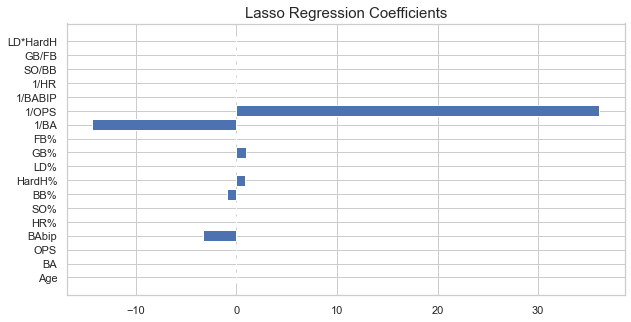

In [862]:
plt.figure(figsize=(10,5))
plt.barh(y=X.columns, width=lasso_model.coef_, align='center')
plt.title('Lasso Regression Coefficients', fontsize = 15);

### RidgeCV

In [843]:
alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_scaled, y)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [844]:
ridge_model.alpha_
#optimal alpha based on lasso

72.32633896483533

In [845]:
r2_ridge_scores = cross_val_score(ridge_model, X, y, # estimator, features, target
                cv=kfold , # number of folds 
                scoring='r2') # scoring metric
neg_mae_ridge_scores = cross_val_score(ridge_model, X, y, # estimator, features, target
                cv=kfold , # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

print('Ridge Regression R^2 Scores:', r2_ridge_scores)
print('')
print('Average Ridge Regression R^2 Scores:', r2_ridge_scores.mean())
print('')
print('Ridge Regression negative MAE Scores:', neg_mae_ridge_scores)
print('')
print('Average Ridge Regression negative MAE Scores:', neg_mae_ridge_scores.mean())

Ridge Regression R^2 Scores: [0.21526772 0.59001671 0.10305009 0.63772335 0.63407934]

Average Ridge Regression R^2 Scores: 0.4360274398958193

Ridge Regression negative MAE Scores: [-23.41710018 -22.5715858  -20.36647764 -19.55400592 -22.37177824]

Average Ridge Regression negative MAE Scores: -21.656189555247188


In [846]:
ridge_model.score(X_scaled, y)

0.6029030388750329

In [847]:
ridge_model.score(X_test_scaled, y_test)
#all three methods similar

0.5368909357157498

In [864]:
print("Ridge Coefficients")
for feature, coef in zip(X.columns, ridge_model.coef_.round(2)):
    print(feature, ':', coef)

Ridge Coefficients
Age : 1.14
BA : -0.32
OPS : -5.05
BAbip : -6.7
HR% : -0.03
SO% : 2.88
BB% : -2.73
HardH% : 1.34
LD% : 0.27
GB% : 3.0
FB% : -0.13
1/BA : -11.98
1/OPS : 26.01
1/BABIP : -0.58
1/HR : 2.42
SO/BB : 0.28
GB/FB : -0.69
LD*HardH : 1.42


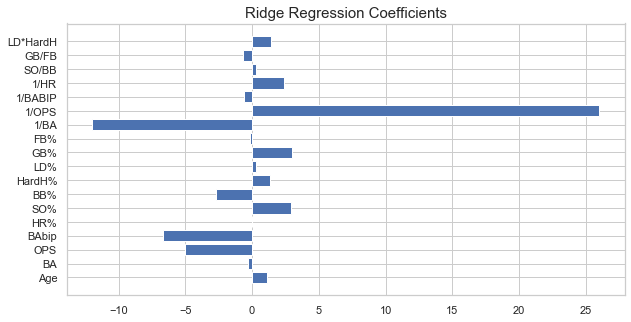

In [849]:
plt.figure(figsize=(10,5))
plt.barh(y=X.columns, width=ridge_model.coef_, align='center')
plt.title('Ridge Regression Coefficients', fontsize = 15);

## Evaluating Model

### Linear Regression 

In [850]:
# Fitted vs. Actual
y_train_lr = lm3.predict(X)

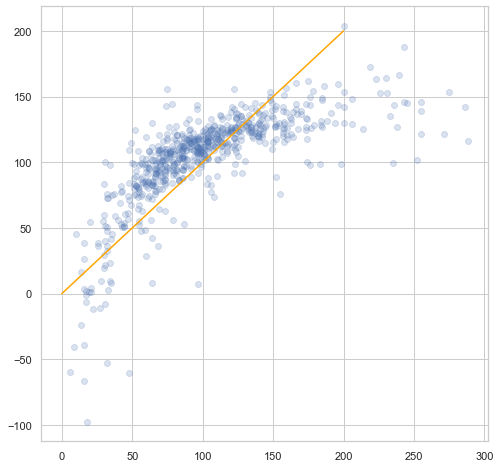

In [865]:
plt.scatter(y, y_train_lr, alpha=0.2)
plt.plot([0, 200], [0, 200], 'orange');
plt.gcf().set_size_inches(8,8)

In [866]:
# Fitted vs. Actual test
y_test_lr = lm3.predict(X_test)

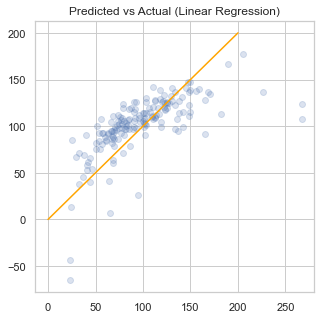

In [870]:
plt.scatter(y_test, y_test_lr, alpha=0.2)
plt.plot([0, 200], [0, 200],'orange')
plt.gcf().set_size_inches(5,5)
plt.title('Predicted vs Actual (Linear Regression)', fontsize = 12);

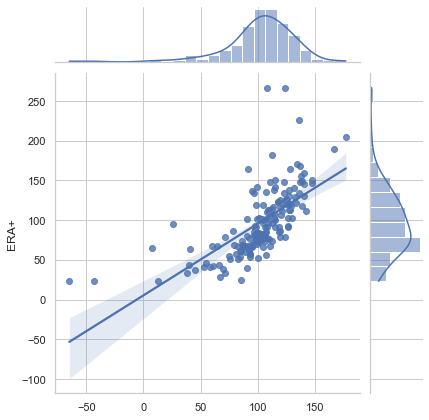

In [852]:
sns.jointplot(x=y_test_lr, y=y_test, kind='reg');

In [ ]:
# Plot Residuals vs. predicted
lr_residuals = y - y_train_lr

plt.scatter(y_train_lr, lr_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")
plt.gcf().set_size_inches(8,8)

##### Linear Regression Final Test

In [853]:
print('R^2 of test data:', simple_reg.score(X_test, y_test))
print('MAE of test data:', mean_absolute_error(y_test, y_test_lr))

R^2 of test data: 0.5443644201777438
MAE of test data: 22.96626622448453


### Lasso

In [854]:
# Fitted vs. Actual
y_train_lasso = lasso_model.predict(X_scaled)

In [ ]:
plt.scatter(y, y_train_lasso, alpha=0.2)
plt.plot([0, 200], [0, 200]);
plt.gcf().set_size_inches(8,8)

In [855]:
# Fitted vs. Actual test
y_test_lasso = lasso_model.predict(X_test_scaled)

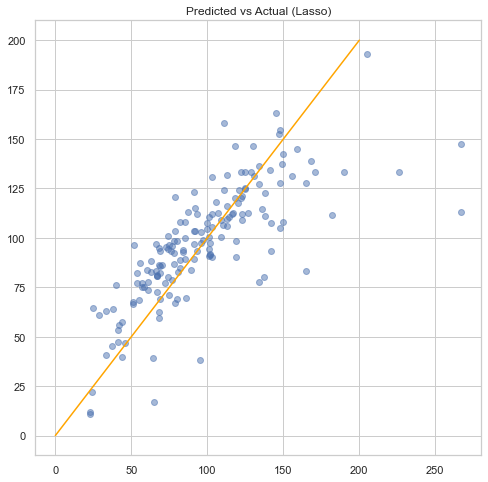

In [875]:
plt.scatter(y_test, y_test_lasso, alpha = 0.5)
plt.plot([0, 200], [0, 200], 'orange')
plt.gcf().set_size_inches(8,8)
plt.title('Predicted vs Actual (Lasso)', fontsize = 12);

In [ ]:
# Plot Residuals vs. predicted

lasso_residuals = y - y_train_lasso

plt.scatter(y_train_lasso, lasso_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")
plt.gcf().set_size_inches(8,8)

##### Lasso Final Test

In [856]:
print('R^2 of test data:', lasso_model.score(X_test_scaled, y_test))
print('MAE of test data:', mean_absolute_error(y_test, y_test_lasso))

R^2 of test data: 0.5703002423914983
MAE of test data: 18.629114139703088


### Ridge

In [857]:
# Fitted vs. Actual
y_train_ridge = ridge_model.predict(X_scaled)

In [ ]:
plt.scatter(y, y_train_ridge, alpha=0.2)
plt.plot([0, 200], [0, 200]);
plt.gcf().set_size_inches(8,8)

In [858]:
# Fitted vs. Actual test
y_test_ridge = ridge_model.predict(X_test_scaled)

In [ ]:
plt.scatter(y_test, y_test_ridge)
plt.plot([0, 400], [0, 400])
plt.gcf().set_size_inches(8,8)

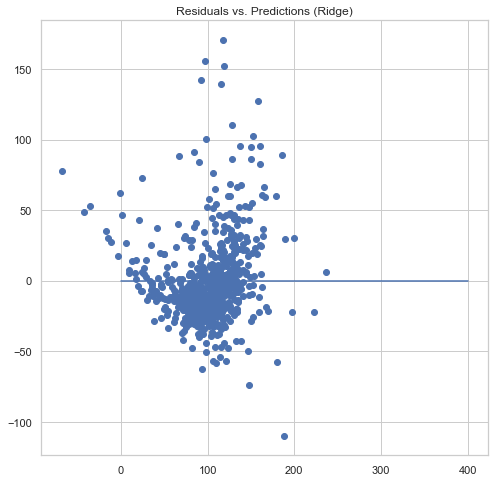

In [876]:
# Plot Residuals vs. predicted

ridge_residuals = y - y_train_ridge

plt.scatter(y_train_ridge, ridge_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions (Ridge)")
plt.gcf().set_size_inches(8,8)

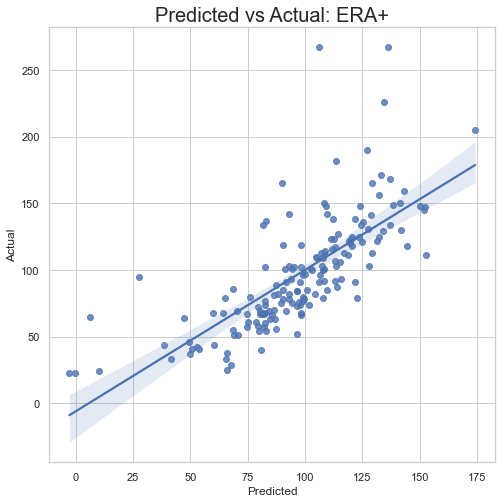

In [860]:
sns.set_style("whitegrid", {'axes.grid' : True})
fig, ax = plt.subplots()
ridge = sns.regplot(x=y_test_ridge, y=y_test)
ridge.set(xlabel='Predicted',ylabel = 'Actual')
plt.title('Predicted vs Actual: ERA+', fontsize = 20)
#ax.text(190,400,'R^2: 0.364', size = 20)
#ax.text(190,350,'MAE: 28.57', size = 20)
plt.gcf().set_size_inches(8,8);

##### Ridge Final Test

In [861]:
print('R^2 of test data on ridge:', ridge_model.score(X_test_scaled, y_test))
print('MAE of test data on ridge:', mean_absolute_error(y_test, y_test_ridge))

R^2 of test data on ridge: 0.5368909357157498
MAE of test data on ridge: 19.607274120303252
